<a href="https://colab.research.google.com/github/Hollydugan/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Do_cute_things_fart%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2


In [2]:
from google.colab import files
uploaded=files.upload()

Saving does-it-fart.csv to does-it-fart.csv


In [5]:
df=pd.read_csv('does-it-fart.csv', sep = ';',
               names=['name', 'scientific_name', 'does_it_fart', 'description_notes', 
               'paper_link', 'verified_by', 'column_7'])
df


,name,scientific_name,does_it_fart,description_notes,paper_link,verified_by,column_7
0,name,Scientific name,Does it Fart?,Description/Notes,Paper/Link,Verified by,Column 7
1,Guinea Pigs,Cavia porcellus,Yes,"Several examples heard every day, very audible...",NaN,NaN,NaN
2,Lagomorphs,Lagomorpha spp.,Yes,"fav joke here ""what's invisible, floats throug...",NaN,@thonoir,NaN
3,Lion,Panthera leo,Yes,At least sedated ones.,NaN,@FattebertJ,NaN
4,Mastodon,NaN,No,Not anymore,NaN,@edorsatum,*
...,...,...,...,...,...,...,...
86,Chimpanzees,Pan troglodytes,Yes,NaN,NaN,@Adriana_lowe,NaN
87,Domestic sheep,NaN,Yes,NaN,NaN,NaN,NaN
88,Domesticated Dogs,Canis lupus familiaris,Yes,"but often takes blame from nearby hominid, Bos...",NaN,"@brianwolven, @CarinaDSLR et al",NaN
89,Herring,Clupea spp.,Yes,Entire bays are filled with their farts. Used ...,http://news.nationalgeographic.com/news/2003/1...,"@CarolineHFox, @gkalinkat",*


In [6]:
farts=df[['name','does_it_fart']]

farts.head()

,name,does_it_fart
0,name,Does it Fart?
1,Guinea Pigs,Yes
2,Lagomorphs,Yes
3,Lion,Yes
4,Mastodon,No


In [7]:
#remove unecessary rows
farts=farts.drop(farts.index[[0,11,14,20,55,59]])
farts.head()

,name,does_it_fart
1,Guinea Pigs,Yes
2,Lagomorphs,Yes
3,Lion,Yes
4,Mastodon,No
5,"Squid, octopus, cuttlefish",Yes


In [8]:
farts=farts.replace({'Hell Yes':3, 'Yes':2, 'Maybe':1, 'No':0})
print(farts.shape)
farts.head()

(85, 2)


,name,does_it_fart
1,Guinea Pigs,2
2,Lagomorphs,2
3,Lion,2
4,Mastodon,0
5,"Squid, octopus, cuttlefish",2


In [9]:
#1 for yes, 0 for no
cute=[1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,
      1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,
      1,0,1,1,0,0,1,1,0,1,0]

farts['are_they_cute']=cute

farts.head()

,name,does_it_fart,are_they_cute
1,Guinea Pigs,2,1
2,Lagomorphs,2,1
3,Lion,2,1
4,Mastodon,0,1
5,"Squid, octopus, cuttlefish",2,0


In [10]:
#1 for yes, 0 for no
do_they_eat_meat=[0,0,1,0,1,1,0,0,0,1,1,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1,0,0,1,
                  0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,
                  1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1]

farts['do_they_eat_meat']=do_they_eat_meat

farts.head()

,name,does_it_fart,are_they_cute,do_they_eat_meat
1,Guinea Pigs,2,1,0
2,Lagomorphs,2,1,0
3,Lion,2,1,1
4,Mastodon,0,1,0
5,"Squid, octopus, cuttlefish",2,0,1


In [11]:
farts.dtypes


name                object
does_it_fart         int64
are_they_cute        int64
do_they_eat_meat     int64
dtype: object

In [12]:
farts['does_it_fart'].unique()

array([2, 0, 1, 3])

In [13]:
farts['does_it_fart'].astype('int')

1     2
2     2
3     2
4     0
5     2
     ..
86    2
87    2
88    2
89    2
90    1
Name: does_it_fart, Length: 85, dtype: int64

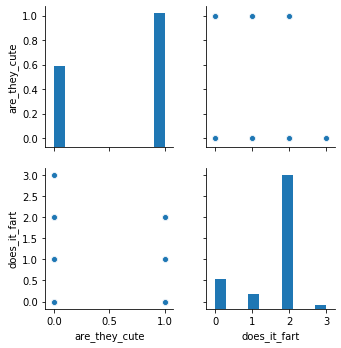

In [14]:
fart_graph=sns.pairplot(farts, vars=['are_they_cute', 'does_it_fart'])


In [0]:
cute_1=farts[farts['are_they_cute']==1]

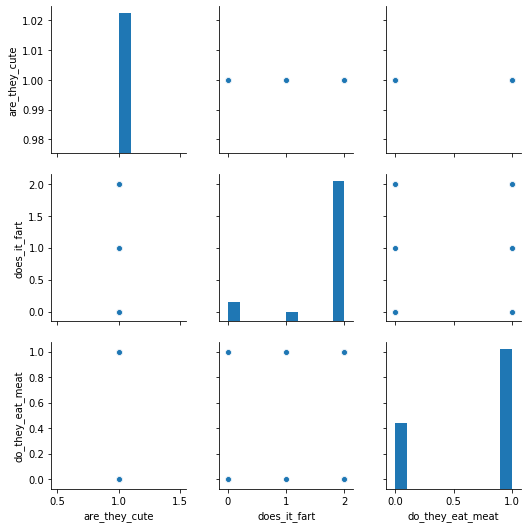

In [16]:
fart_graph_2=sns.pairplot(cute_1, vars=['are_they_cute', 'does_it_fart', 'do_they_eat_meat'])

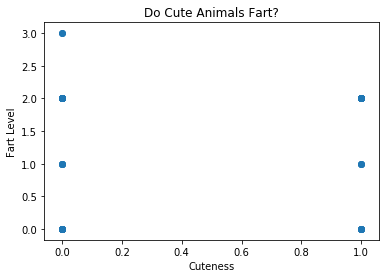

In [22]:
plt.scatter(x=farts['are_they_cute'], y=farts['does_it_fart'])
plt.xlabel('Cuteness')
plt.ylabel('Fart Level')
plt.title('Do Cute Animals Fart?')
plt.show;

In [18]:
pd.crosstab(farts['does_it_fart'], farts['are_they_cute'], normalize=True)



are_they_cute,0,1
does_it_fart,,
0,0.094118,0.070588
1,0.047059,0.035294
2,0.211765,0.517647
3,0.023529,0.000000


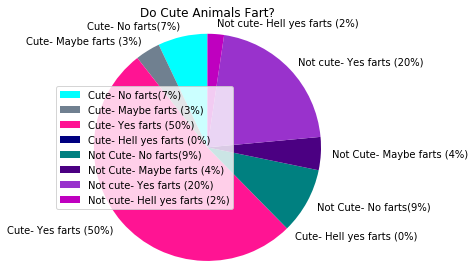

In [19]:


labels = ['Cute- No farts(7%)', 'Cute- Maybe farts (3%)', 'Cute- Yes farts (50%)', 'Cute- Hell yes farts (0%)',
          'Not Cute- No farts(9%)', 'Not Cute- Maybe farts (4%)', 'Not cute- Yes farts (20%)', 'Not cute- Hell yes farts (2%)']
sizes = [0.070588, 0.035294, 0.517647, 0.000000,0.094118,0.047059,0.211765,0.023529]
colors = ['cyan', 'slategrey', 'deeppink', 'navy', 'teal', 'indigo','darkorchid', 'm']
patches, texts = plt.pie(sizes,labels=labels, colors=colors, shadow=False, startangle=90)
plt.legend (patches, labels, loc="center left")
plt.title('Do Cute Animals Fart?')
plt.axis('equal')
plt.tight_layout()
plt.show()